In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()




,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


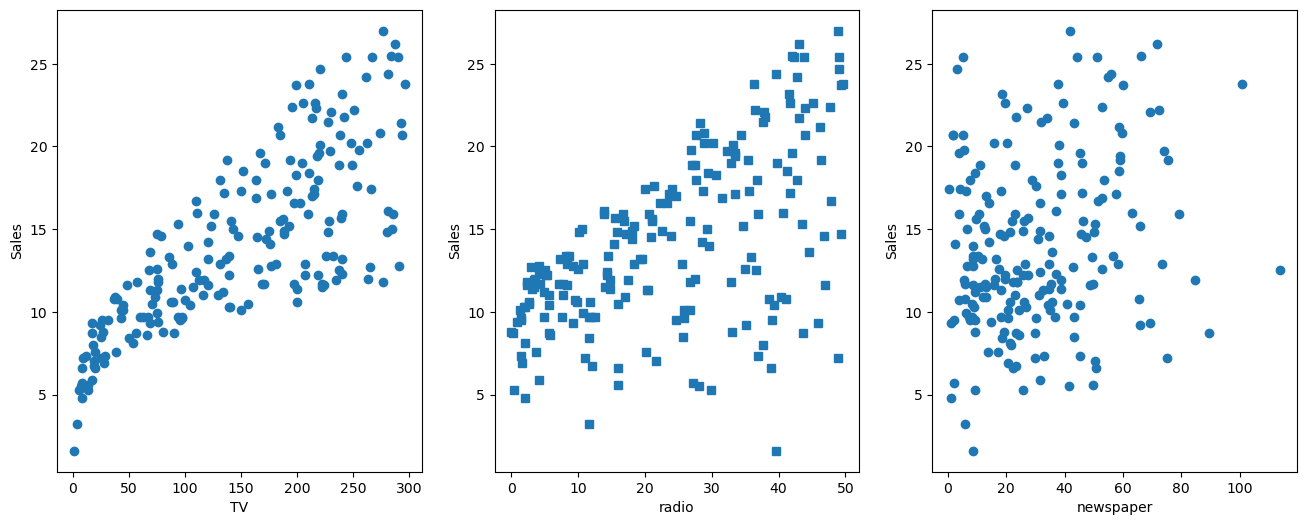

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize = (16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV')

axes[1].plot(df['radio'],df['sales'],'s')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('radio')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('newspaper')

plt.show()

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

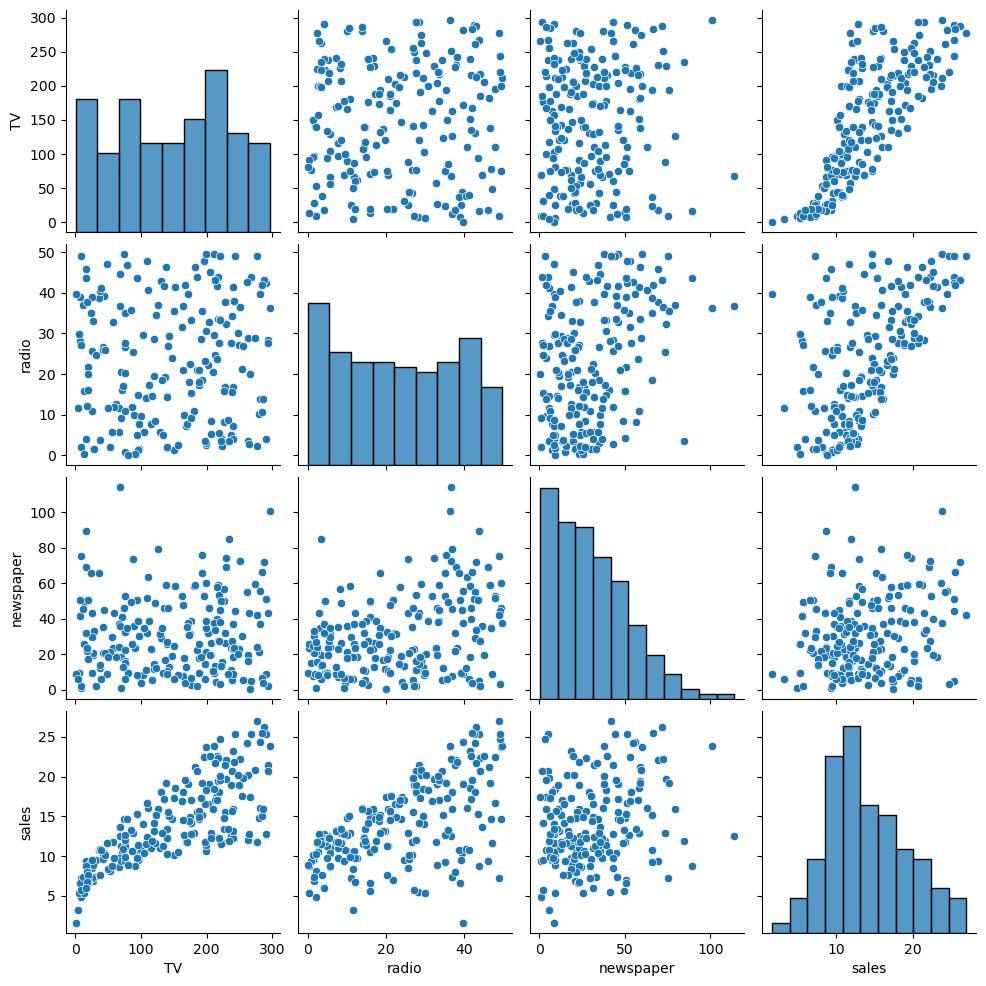

In [11]:
sns.pairplot(df)

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### SciKit Learn

In [14]:
X = df.drop('sales',axis=1) #features
y = df['sales']

### Train Test split

always there in supervised learning

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=50)


# chose test size such that as you have sufficient number of rows to test your model on (absolute number). 

### Import a model class from  a model family

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#create an instance of the model with parameters
l_model = LinearRegression()

### Fit/Train the Model on the training data

In [22]:
l_model.fit(X_train,y_train)  
#make sure that you only fir to the training data in order to fairly evaluate your 
#model's performance on unseen data

LinearRegression()

In [26]:
y_pred = l_model.predict(X_test) #this is predicted sales (labels)

#y_test is true sales

### Evaluate model performace

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
df['sales'].mean()

14.0225

In [27]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [28]:
MAE

1.214660914295371

In [29]:
MSE

2.5582837836980024

In [30]:
RMSE

1.5994635924890577

### Plotting Residuals

In [32]:
test_res = y_test - y_pred

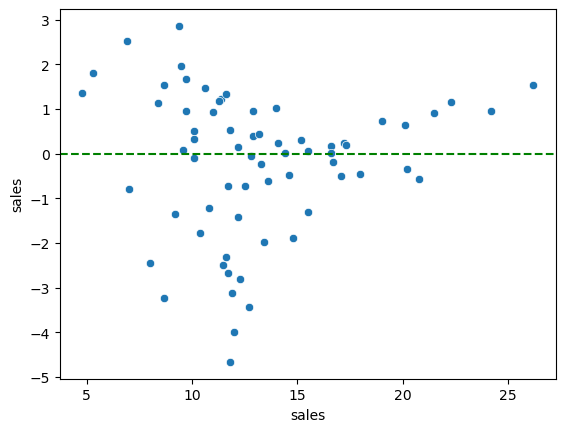

In [34]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='green',ls='--')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


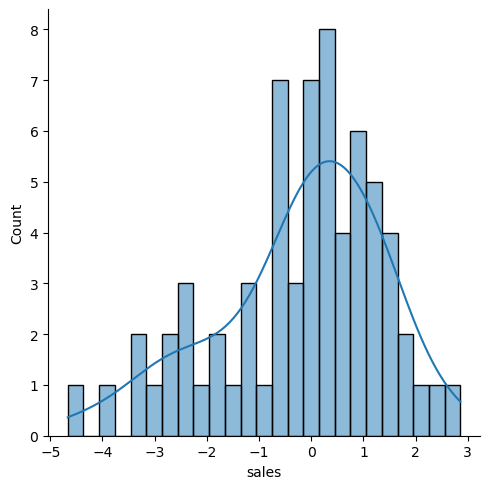

In [36]:
sns.displot(test_res,kde=True, bins=25)

### Retraining Model on full data

In [37]:
#create a new model instance to train on entire dataset
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

#### Deployment, Predictions and Model Attributes

In [38]:
#final model fit

y_hat = final_model.predict(X)

In [40]:
len(y_hat)

200

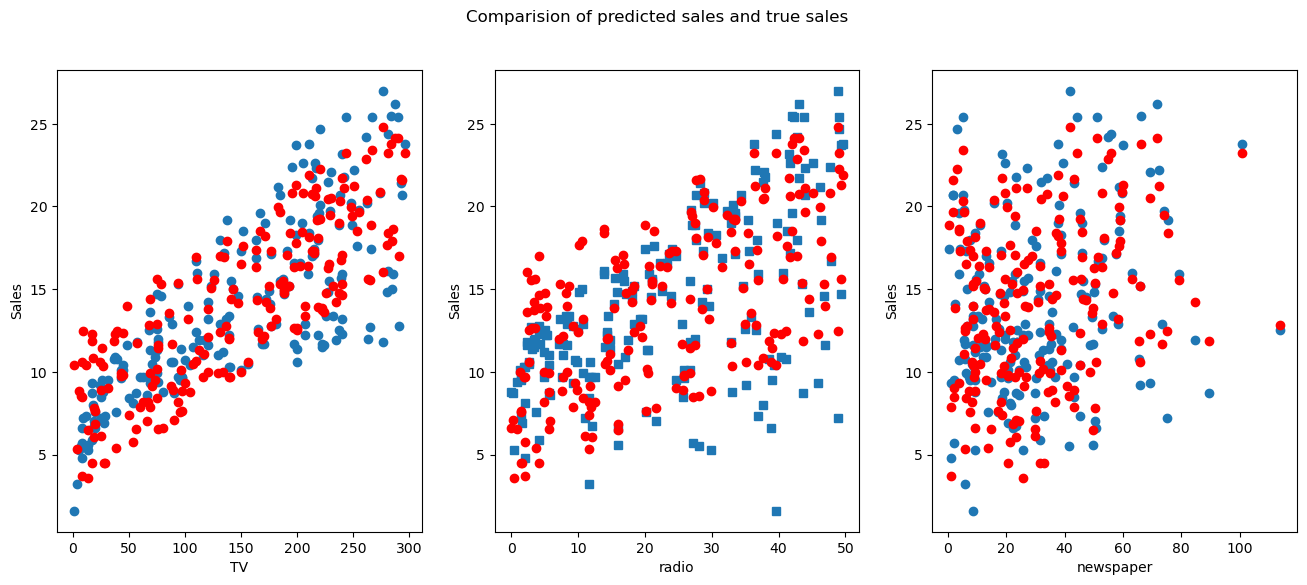

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize = (16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV')

axes[1].plot(df['radio'],df['sales'],'s')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('radio')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('newspaper')

plt.suptitle('Comparision of predicted sales and true sales')
plt.show()

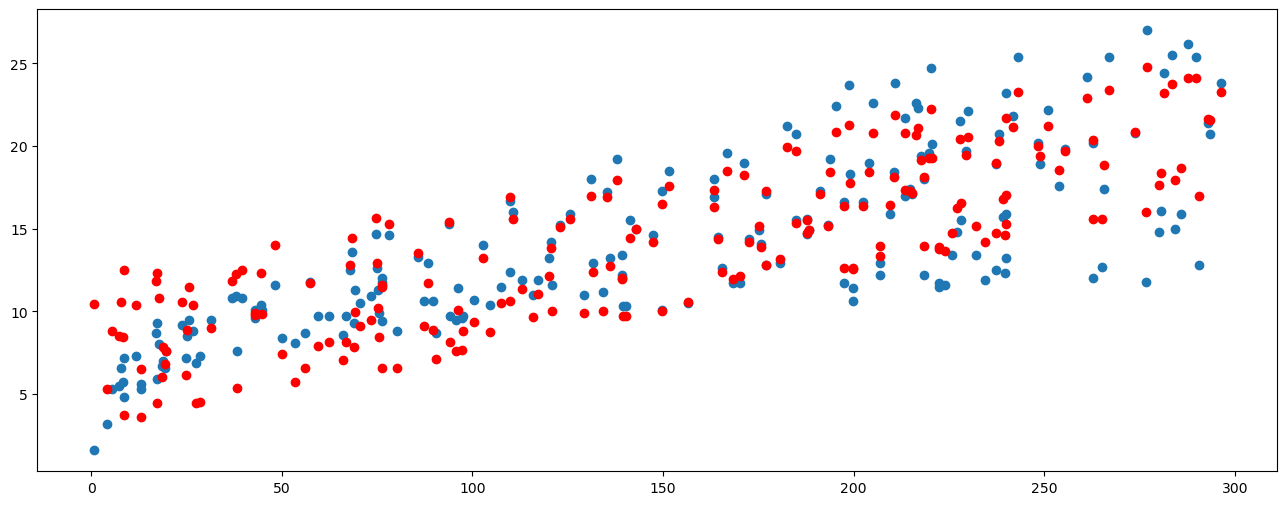

In [43]:
plt.figure(figsize=(16,6))
plt.plot(df['TV'],df['sales'],'o')
plt.plot(df['TV'],y_hat,'o',color='red')

## Residuals

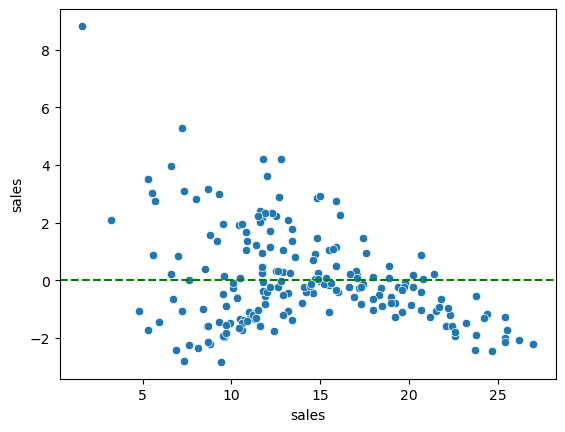

In [45]:
sns.scatterplot(x=y, y = y_hat-y)
plt.axhline(y=0,color='green',ls='--')

In [46]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [47]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [48]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New data

In [51]:
campaign = [[149,23,12], [149,23,12000]]

final_model.predict(campaign)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.08156201,  1.64409542])

### Model presistence (Saving and loading a model)

In [52]:
from joblib import dump, load

In [53]:
dump(final_model,'sales_model_hmlpa.joblib')

['sales_model_hmlpa.joblib']

In [54]:

loaded_model_hmlpa = load('sales_model_hmlpa.joblib')
campaign = [[149,23,12], [19,203,0.1],[12,151,1]]
loaded_model_hmlpa.predict(campaign)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.08156201, 42.07990732, 31.95506018])